## Create heatmaps of feature tables

**Author**: Madeleine Ernst (mernst@ucsd.edu) <br>
**Edited by**: - <br>
**Use case**: Create heatmaps of overall and annotated features across different samples. <br>
**Input file format**: <br>
<ul>
<li>**Feature table with metadata** (.csv) table with samples in rows and metadata as well as features in columns. </li>
<li>**GNPS library matches** (.tsv) table retrieved from GNPS within the DB_result output folder.</li>
</ul>
**Outputs**: Heatmaps with overall and only annotated features selected <br>
**Dependencies**: R version 3.3.3 (2017-03-06) and libraries RColorBrewer_1.1-2 and gplots_3.0.1  

In [1]:
mylib <- '~/Rlib'

if (!dir.exists(mylib)){
    dir.create(mylib)
}
library(gplots, lib.loc = mylib)
library(RColorBrewer, lib.loc = mylib)


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



read feature table with metadata file

In [2]:
data <- read.csv("FeatureTable_G1_meat_Clean.csv", header=TRUE, stringsAsFactors=F,row.names=1)
data[1:5,1:5]

,additives,additives_specific,age,age_units,animal_product_substitute
G96149_5x_RE4_01_32416.mzXML,no,not applicable,not applicable,not applicable,no
G96150_5x_RD6_01_32399.mzXML,no,not applicable,not applicable,not applicable,no
G96151_5x_RH5_01_32741.mzXML,no,not applicable,not applicable,not applicable,no
G96158_5x_RG3_01_32704.mzXML,no,not applicable,not applicable,not applicable,no
G96159_5x_RA3_01_32574.mzXML,no,not applicable,not applicable,not applicable,no


read GNPS library matches

In [3]:
db <- read.csv("34510dfb499f46b4a38b0f4413287947.tsv",sep="\t",quote="")
head(db)

X.Scan.,Adduct,CAS_Number,Charge,Compound_Name,Compound_Source,Data_Collector,ExactMass,FileScanUniqueID,INCHI,⋯,RT_Query,SharedPeaks,Smiles,SpecCharge,SpecMZ,SpectrumFile,SpectrumID,TIC_Query,UpdateWorkflowName,tags
1,M+H,63-91-2,1,L-phenylalanine,Crude,TieJun Ling,165.079,spectra/specs_ms.mgf1,,⋯,0,4,O=C(O)[C@@H](N)Cc1ccccc1,1,166.086,spectra/specs_ms.mgf,CCMSLIB00003142421,271973,UPDATE-SINGLE-ANNOTATED-BRONZE,
10007,M-H,363495,1,7-Hydroxy-2-acetylaminofluorene,Isolated,NIST,0.000,spectra/specs_ms.mgf10007,"InChI=1S/C15H13NO2/c1-9(17)16-12-2-4-14-10(7-12)6-11-8-13(18)3-5-15(11)14/h2-5,7-8,18H,6H2,1H3,(H,16,17)",⋯,0,4,CC(=O)NC1=CC2=C(C=C1)C3=C(C2)C=C(C=C3)O,1,238.129,spectra/specs_ms.mgf,CCMSLIB00003605279,3627,UPDATE-SINGLE-ANNOTATED-BRONZE,
10008,M+H,N/A,1,Spectral Match to Tyr-Leu from NIST14,Isolated,Data deposited by fevargas,0.000,spectra/specs_ms.mgf10008,N/A,⋯,0,4,N/A,1,295.166,spectra/specs_ms.mgf,CCMSLIB00003138902,18847,UPDATE-SINGLE-ANNOTATED-BRONZE,
10011,M+H,N/A,1,Spectral Match to Tyr-Leu from NIST14,Isolated,Data deposited by fevargas,0.000,spectra/specs_ms.mgf10011,N/A,⋯,0,4,N/A,1,295.167,spectra/specs_ms.mgf,CCMSLIB00003138902,18847,UPDATE-SINGLE-ANNOTATED-BRONZE,
10018,M+H,N/A,1,Spectral Match to Tyr-Leu from NIST14,Isolated,Data deposited by fevargas,0.000,spectra/specs_ms.mgf10018,N/A,⋯,0,5,N/A,1,295.166,spectra/specs_ms.mgf,CCMSLIB00003138902,20317,UPDATE-SINGLE-ANNOTATED-BRONZE,
10026,M+H,N/A,1,Spectral Match to Tyr-Leu from NIST14,Isolated,Data deposited by fevargas,0.000,spectra/specs_ms.mgf10026,N/A,⋯,0,4,N/A,1,295.166,spectra/specs_ms.mgf,CCMSLIB00003138902,18847,UPDATE-SINGLE-ANNOTATED-BRONZE,


how many metadata columns are there? (here 141)

In [4]:
nonfeatures <- c(1:141)

In [5]:
# Normalize the features by TIC and adding 1 to all feature intensities 
tab2 <- data

tab2[,-nonfeatures] <- t(apply(tab2[,-nonfeatures], 1, function(x) (x+1)/sum((x+1))))
colnames(tab2)[-nonfeatures] <- gsub("X","",colnames(tab2)[-nonfeatures])
                               tab2 <- tab2[-which(tab2$known_contamination=="tetracycline"),]
tab2$distributor_brand[tab2$distributor_brand=="sun fed ranch"] <- "a sun fed ranch"

tab2$age <- as.numeric(tab2$age)

tab2 <- tab2[with(tab2, order(sample_type_group6,collection_timestamp,distributor_brand)), ]
ft <- tab2[,c((length(nonfeatures)+1):ncol(tab2))]
my_palette <- colorRampPalette(c("blue","white","red"))(n = 15) 

tab2$type_age <- paste(tab2$sample_type_group6,tab2$collection_timestamp,sep="_")
colpal <- c(brewer.pal(5, "Reds"),brewer.pal(5, "Blues"))

Rowside_species <- tab2$type_age
Rowside_cols <- colpal[as.numeric(as.factor(Rowside_species))]

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

plot heatmap

Warning message in heatmap.2(t(ft), cexCol = 0.1, cexRow = 0.1, scale = "row", Colv = FALSE, :
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”

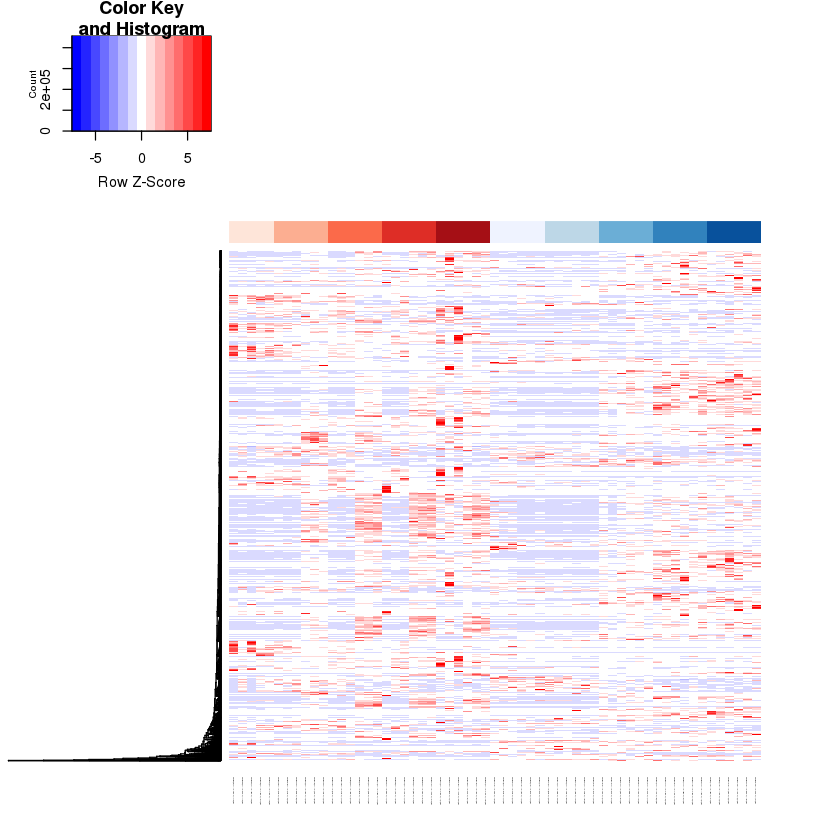

In [6]:
heatmap.2(t(ft), cexCol = 0.1,cexRow = 0.1,scale="row", Colv= FALSE, col = my_palette, tracecol=NA,ColSideColors=Rowside_cols,labRow = FALSE) #

save heatmap to pdf

In [21]:
pdf(file="Meat_HeatMap_RowScaled_NoAntibiotics_withNames.pdf", width=11, height=200)
heatmap.2(t(ft), cexCol = 0.1,cexRow = 0.1,scale="row", Colv= FALSE, col = my_palette, tracecol=NA,ColSideColors=Rowside_cols) #labRow = FALSE
dev.off()

Warning message in heatmap.2(t(ft), cexCol = 0.1, cexRow = 0.1, scale = "row", Colv = FALSE, :
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”

png 
  2

### create heatmaps with only annotated features

In [9]:
### Subselect only annotated features
f_ids <- unlist(lapply(strsplit(colnames(tab2)[(length(nonfeatures)+1):ncol(tab2)],split="_"), `[[`, 1))

tab2 <- tab2[,c(nonfeatures,which(f_ids %in% db$X.Scan.)+length(nonfeatures))]
colnames(tab2)[(length(nonfeatures)+1):ncol(tab2)] <- as.character(db$Compound_Name[which(db$X.Scan. %in% f_ids)])
ft <- tab2[,c((length(nonfeatures)+1):ncol(tab2))]

plot heatmap

Warning message in heatmap.2(t(ft), cexCol = 0.1, cexRow = 0.08, scale = "row", :
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”

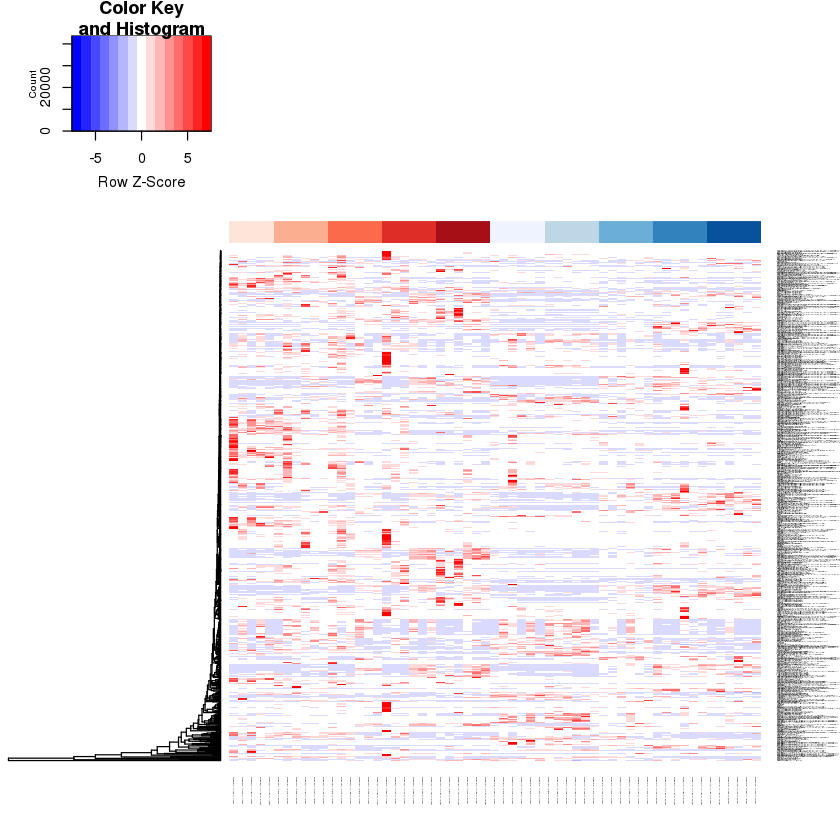

In [10]:
heatmap.2(t(ft), cexCol = 0.1,cexRow = 0.08,scale="row", Colv= FALSE, col = my_palette, tracecol=NA,ColSideColors=Rowside_cols) #

save heatmap to pdf

In [ ]:
pdf(file="Meat_HeatMap_RowScaled_NoAntibiotics_Annotated_CompoundNames.pdf", width=11, height=20)
heatmap.2(t(ft), cexCol = 0.1,cexRow = 0.08,scale="row", Colv= FALSE, col = my_palette, tracecol=NA,ColSideColors=Rowside_cols) #
dev.off()